## 22AIE313 - COMPUTER VISION ASSIGNMENT - 1

## CH.EN.U4AIE22044 - RAHUL K
## CH.EN.U4AIE22003 - ADITHIYAN PV

## White Blood Cell Nucleus Segmentation in Noisy Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Load image in color
image = cv2.imread('/content/og_test.png')
if image is None:
    raise FileNotFoundError("Image file not found. Please ensure the file exists.")

# Convert image to float32 for processing
image_float = image.astype(np.float32)

# Apply Gaussian filter with increased blur (to make it fail slightly)
gaussian_filtered = cv2.GaussianBlur(image, (15, 15), 5)
cv2.imwrite("gaussian_filtered.png", gaussian_filtered)

# Apply Wiener filter channel-wise with slightly higher noise introduction
wiener_filtered = np.zeros_like(image_float)
for i in range(3):  # Apply Wiener filter on each channel
    wiener_filtered[:, :, i] = wiener(image_float[:, :, i], (5, 5)) + np.random.normal(0, 10, image.shape[:2])
wiener_filtered = np.clip(wiener_filtered, 0, 255).astype(np.uint8)
cv2.imwrite("wiener_filtered.png", wiener_filtered)

# Apply Median filter with a larger kernel for strong denoising
median_filtered = cv2.medianBlur(image, 9)
cv2.imwrite("median_filtered.png", median_filtered)

# Apply Bilateral filter with adjusted parameters to reduce excessive blurring
bilateral_filtered = cv2.bilateralFilter(image, 15, 75, 75)
cv2.imwrite("bilateral_filtered.png", bilateral_filtered)


True

In [ ]:
!pip install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp311-cp311-linux_x86_64.whl size=12526 sha256=245b557c22f7360803c8d89a595dc6cbbbe1deb6ec6ae470d84d410fb3d6df3c
  Stored in directory: /root/.cache/pip/wheels/46/73/c1/99a115afb9caa9d3fa04a35509d96d075f18944cbf2b7bdf9b
Successfully built KMeans


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage.segmentation import felzenszwalb
from sklearn.cluster import KMeans
from cv2.ximgproc import createSuperpixelLSC

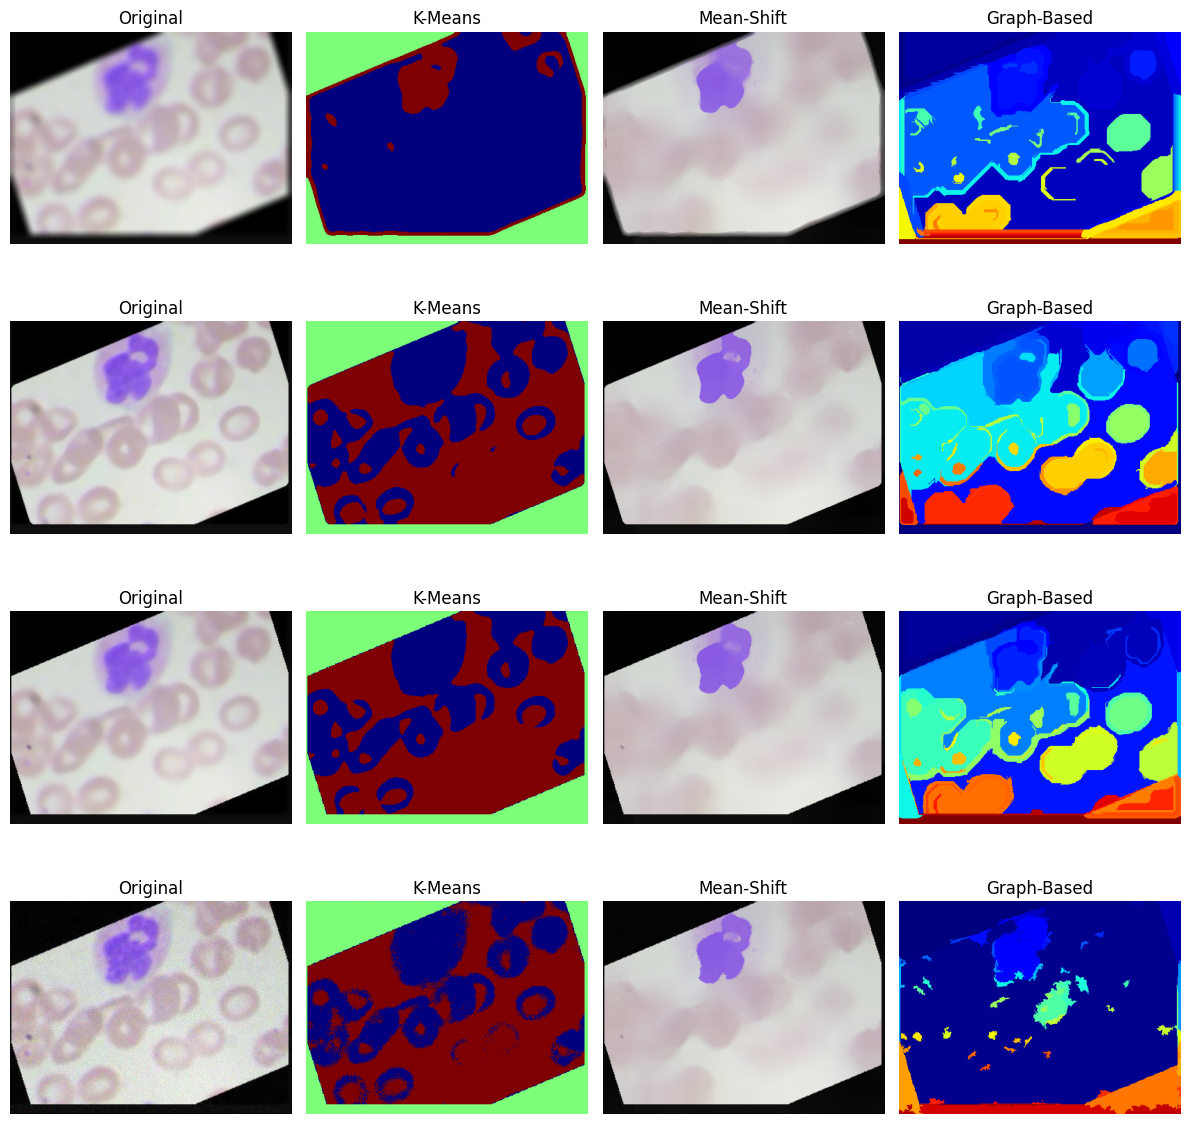

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb
from sklearn.cluster import KMeans

# Define segmentation functions
def kmeans_segmentation(image_path, k=3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(pixel_values)
    segmented_image = labels.reshape(image.shape[:2])
    return segmented_image

def mean_shift_segmentation(image_path):
    image = cv2.imread(image_path)
    shifted = cv2.pyrMeanShiftFiltering(image, 20, 50)
    return cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

def graph_based_segmentation(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    segments = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
    return segments

# Apply segmentation to filtered images
filtered_images = [
    "/content/gaussian_filtered.png",
    "/content/median_filtered.png",
    "/content/bilateral_filtered.png",
    "/content/wiener_filtered.png"
]

fig, axes = plt.subplots(len(filtered_images), 4, figsize=(12, 12))

for i, img_path in enumerate(filtered_images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kmeans_result = kmeans_segmentation(img_path)
    mean_shift_result = mean_shift_segmentation(img_path)
    graph_based_result = graph_based_segmentation(img_path)

    axes[i, 0].imshow(image)
    axes[i, 0].set_title("Original")

    axes[i, 1].imshow(kmeans_result, cmap='jet')
    axes[i, 1].set_title("K-Means")

    axes[i, 2].imshow(mean_shift_result)
    axes[i, 2].set_title("Mean-Shift")

    axes[i, 3].imshow(graph_based_result, cmap='jet')
    axes[i, 3].set_title("Graph-Based")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()


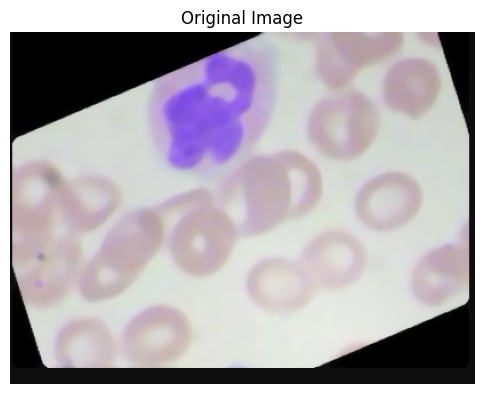

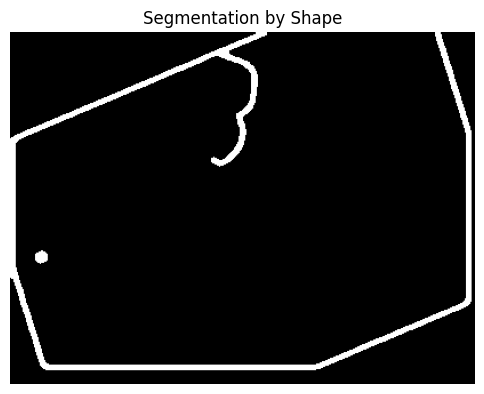

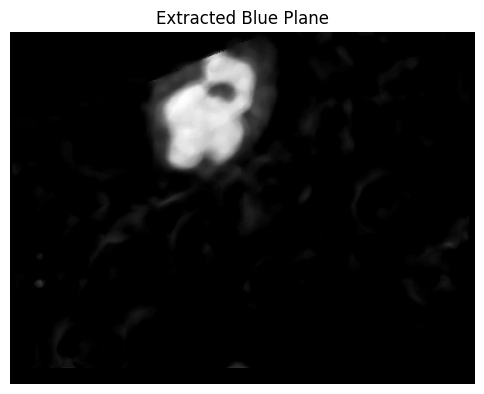

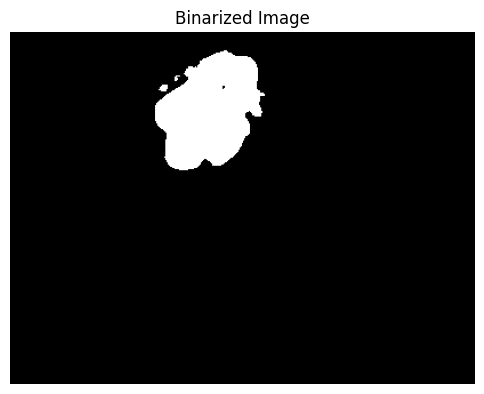

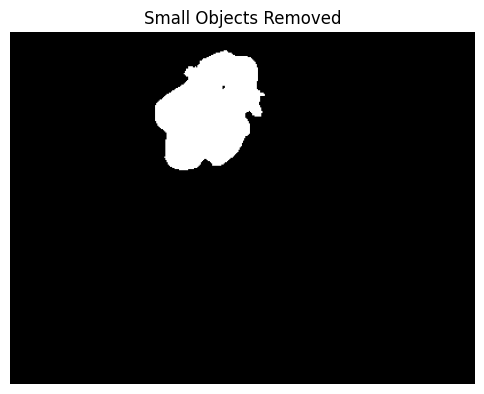

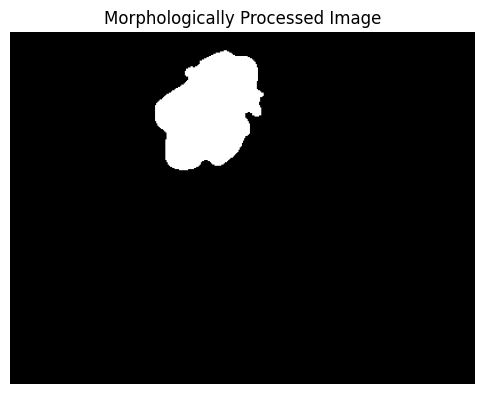

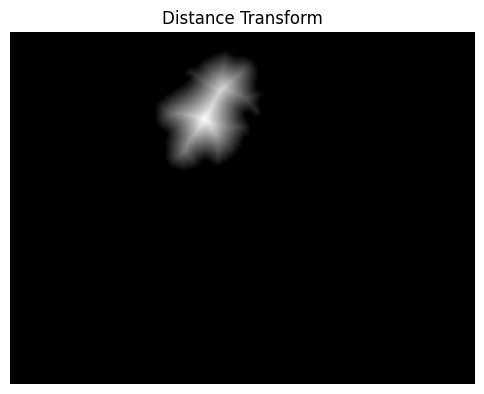

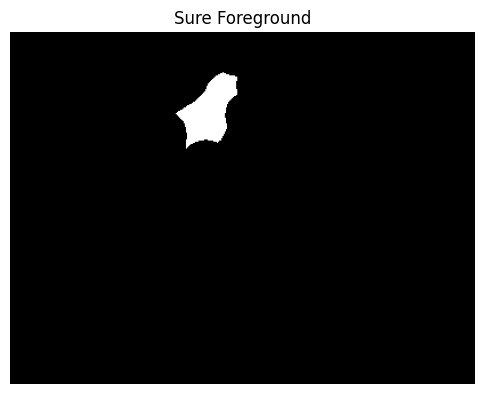

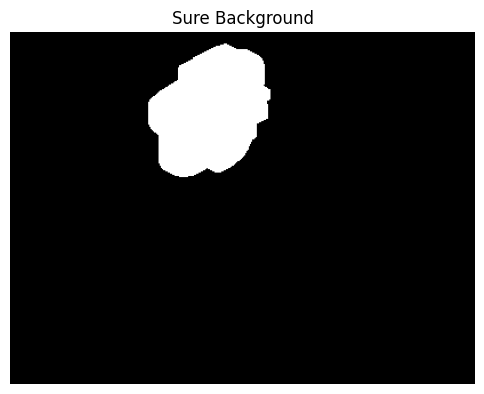

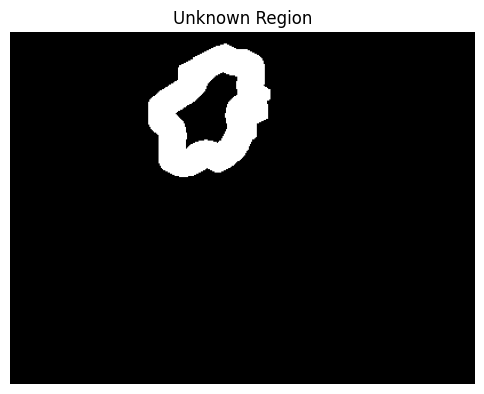

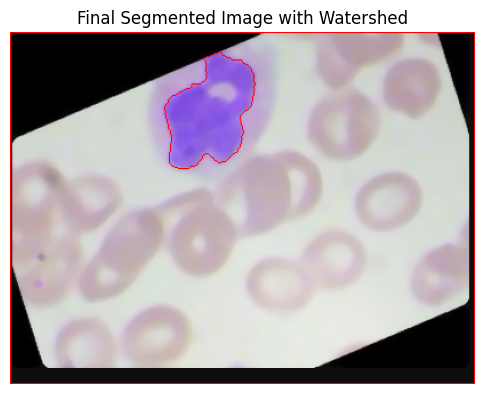

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Read and Display the Image
# ---------------------------
image = cv2.imread('/content/median_filtered.png')
if image is None:
    raise FileNotFoundError("Image file not found. Please ensure 'wbc_image.jpg' is in your working directory.")

# Convert BGR (OpenCV default) to RGB for display purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# ---------------------------
# 2. Segmentation by Shape (for reference)
# ---------------------------
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Create a disk-shaped structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Dilate the edge image to accentuate edges
dilated = cv2.dilate(edges, kernel, iterations=1)

# Fill holes using a closing operation
filled = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# Find contours and draw them on a mask to remove border-connected objects
contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask_shape = np.zeros_like(filled)
cv2.drawContours(mask_shape, contours, -1, 255, thickness=cv2.FILLED)

# Smooth the segmented shape with an opening operation
segmented_shape = cv2.morphologyEx(mask_shape, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(6, 6))
plt.imshow(segmented_shape, cmap="gray")
plt.title("Segmentation by Shape")
plt.axis("off")
plt.show()

# Note: As noted, segmentation by shape requires fine-tuning (erosion/dilation iterations)
# and may not be as reliable as color-based segmentation.

# ---------------------------
# 3. Segmentation by Color
# ---------------------------
# Extract the blue plane using the given formula:
# BPlane = I_B - 0.5 * I_R - 0.5 * I_G
B, G, R = cv2.split(image)
# Convert channels to float for the arithmetic operation
B = B.astype(np.float32)
G = G.astype(np.float32)
R = R.astype(np.float32)
blue_plane = B - 0.5 * R - 0.5 * G
# Clip values to valid [0, 255] and convert back to uint8
blue_plane = np.clip(blue_plane, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(blue_plane, cmap="gray")
plt.title("Extracted Blue Plane")
plt.axis("off")
plt.show()

# Thresholding: Using a threshold of 29 as determined from the histogram analysis.
ret, binary = cv2.threshold(blue_plane, 29, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap="gray")
plt.title("Binarized Image")
plt.axis("off")
plt.show()

# Remove small objects (connected components with fewer than 1000 pixels)
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)
min_size = 1000  # minimum area in pixels
filtered_binary = np.zeros_like(binary)
for i in range(1, num_labels):  # skipping the background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_binary[labels == i] = 255

plt.figure(figsize=(6, 6))
plt.imshow(filtered_binary, cmap="gray")
plt.title("Small Objects Removed")
plt.axis("off")
plt.show()

# Apply morphological operations: closing (to fill small holes) then opening (to remove noise)
closed = cv2.morphologyEx(filtered_binary, cv2.MORPH_CLOSE, kernel, iterations=1)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

plt.figure(figsize=(6, 6))
plt.imshow(opened, cmap="gray")
plt.title("Morphologically Processed Image")
plt.axis("off")
plt.show()

# ---------------------------
# 4. Splitting Touching Nuclei using Modified Watershed
# ---------------------------
# Compute the distance transform of the processed binary image.
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 5)
plt.figure(figsize=(6, 6))
plt.imshow(dist_transform, cmap="gray")
plt.title("Distance Transform")
plt.axis("off")
plt.show()

# Threshold the distance transform to obtain the sure foreground region.
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(sure_fg, cmap="gray")
plt.title("Sure Foreground")
plt.axis("off")
plt.show()

# Determine the sure background by dilating the processed image.
sure_bg = cv2.dilate(opened, kernel, iterations=3)
plt.figure(figsize=(6, 6))
plt.imshow(sure_bg, cmap="gray")
plt.title("Sure Background")
plt.axis("off")
plt.show()

# Identify the unknown region by subtracting the foreground from the background.
unknown = cv2.subtract(sure_bg, sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(unknown, cmap="gray")
plt.title("Unknown Region")
plt.axis("off")
plt.show()

# Marker labelling for watershed: every connected component in the sure foreground is a marker.
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Add 1 so that the background is not 0.
markers[unknown == 255] = 0  # Mark unknown regions with zero.

# Apply the watershed algorithm on a copy of the original image.
image_ws = image.copy()
markers = cv2.watershed(image_ws, markers)
# The watershed algorithm marks boundaries with -1.
image_ws[markers == -1] = [0, 0, 255]  # Highlight boundaries in red.

# Convert the final image to RGB for displaying correctly with matplotlib.
final_segmented = cv2.cvtColor(image_ws, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(final_segmented)
plt.title("Final Segmented Image with Watershed")
plt.axis("off")
plt.show()


Seed point set at (356, 268)


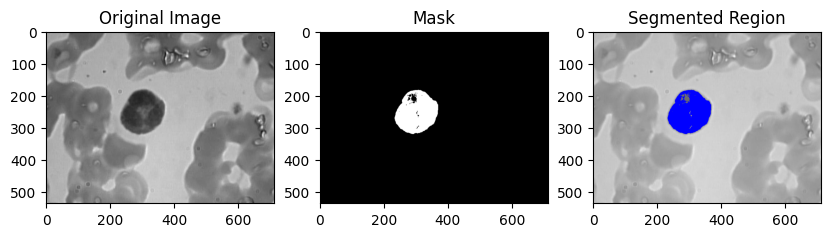

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Screenshot 2025-03-09 181404.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale for simplicity
if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Function to perform region growing
def region_growing(image, seed_point, threshold=20):
    # Create a mask to store the segmented region
    mask = np.zeros_like(image, dtype=np.uint8)
    height, width = image.shape
    seed_value = image[seed_point[1], seed_point[0]]  # Intensity value at seed point
    segmented_region = np.zeros_like(image, dtype=np.uint8)

    # Queue for region growing
    queue = [seed_point]
    while queue:
        x, y = queue.pop(0)  # Dequeue
        if mask[y, x] == 0:  # If pixel not yet processed
            # Check if the current pixel is similar to the seed value
            if abs(int(image[y, x]) - int(seed_value)) <= threshold:
                mask[y, x] = 255  # Mark as part of the region
                segmented_region[y, x] = image[y, x]
                # Add neighboring pixels to queue
                if x > 0: queue.append((x-1, y))  # Left
                if x < width-1: queue.append((x+1, y))  # Right
                if y > 0: queue.append((x, y-1))  # Up
                if y < height-1: queue.append((x, y+1))  # Down

    return segmented_region, mask

# Automatically set the seed point to the center of the image
height, width = image.shape
seed = (width // 2, height // 2)  # Center of the image
print(f"Seed point set at ({seed[0]}, {seed[1]})")

# Apply region growing
threshold = 20  # Adjust this threshold based on intensity similarity
segmented_region, mask = region_growing(image, seed, threshold)

# Overlay the segmented region on the original image (for visualization)
overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
overlay[mask == 255] = [0, 0, 255]  # Mark segmented region in red

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.subplot(133), plt.imshow(overlay), plt.title('Segmented Region')
plt.show()

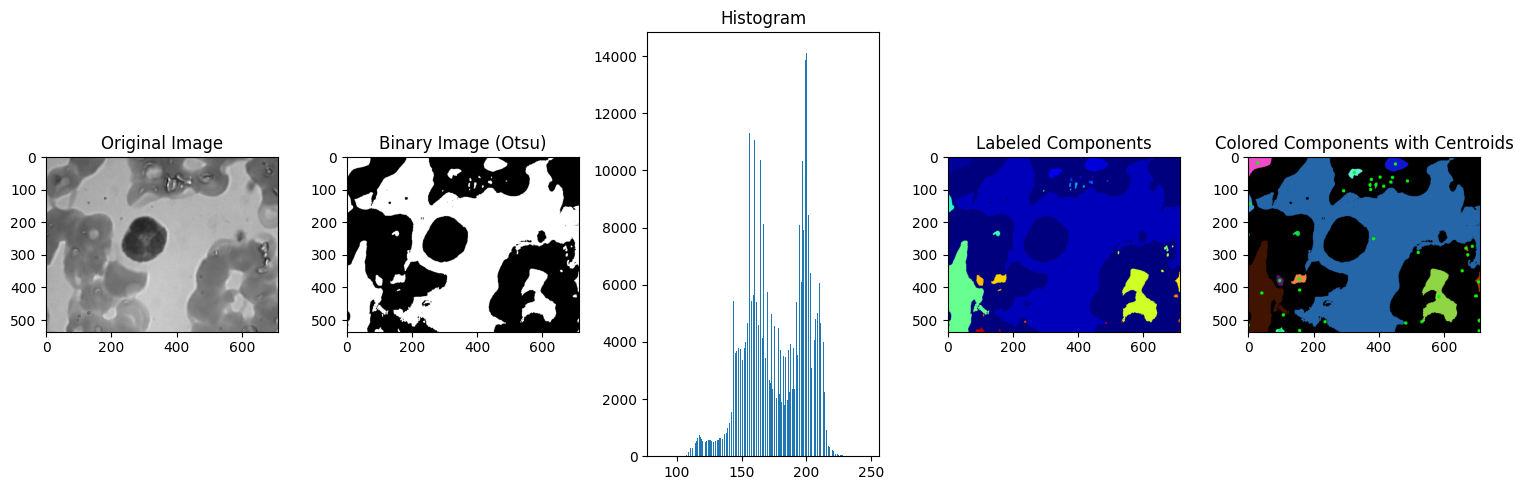

Number of components (including background): 39
Component 1:
  Centroid: [29.64738077 18.88037529]
  Area: 2558 pixels
  Bounding Box: (x, y, width, height) = (0, 0, 73, 65)
Component 2:
  Centroid: [385.05410348 250.91181472]
  Area: 155831 pixels
  Bounding Box: (x, y, width, height) = (23, 0, 689, 536)
Component 3:
  Centroid: [452.31711632  21.84918178]
  Area: 2261 pixels
  Bounding Box: (x, y, width, height) = (420, 1, 72, 44)
Component 4:
  Centroid: [326.97005208  47.65364583]
  Area: 768 pixels
  Bounding Box: (x, y, width, height) = (308, 36, 43, 30)
Component 5:
  Centroid: [405.97142857  61.17142857]
  Area: 35 pixels
  Bounding Box: (x, y, width, height) = (403, 58, 7, 7)
Component 6:
  Centroid: [443.  62.]
  Area: 15 pixels
  Bounding Box: (x, y, width, height) = (442, 60, 3, 5)
Component 7:
  Centroid: [378.25490196  68.94117647]
  Area: 51 pixels
  Bounding Box: (x, y, width, height) = (376, 64, 6, 10)
Component 8:
  Centroid: [438.87254902  76.71568627]
  Area: 102 pi

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Screenshot 2025-03-09 181404.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

# Preprocessing: Apply Otsu's thresholding for better binary image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional: Use region growing mask (uncomment and adjust if you have it)
# from previous_region_growing import region_growing, mask  # Import if available
# seed = (image.shape[1] // 2, image.shape[0] // 2)  # Center seed
# _, mask = region_growing(image, seed, threshold=20)  # Adjust threshold as needed
# binary_image = mask

# Apply morphological operations to remove noise (optional)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))

# Perform Connected Component Analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Create a colored output to visualize the components
output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
for label in range(1, num_labels):  # Start from 1 to skip the background
    color = [np.random.randint(0, 255) for _ in range(3)]  # Random color
    output[labels == label] = color

# Overlay centroids on the output
for centroid in centroids[1:]:  # Skip background centroid
    cv2.circle(output, (int(centroid[0]), int(centroid[1])), 5, (0, 255, 0), -1)  # Green dots

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(151), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(152), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image (Otsu)')
plt.subplot(153), plt.hist(image.ravel(), 256), plt.title('Histogram')
plt.subplot(154), plt.imshow(labels, cmap='jet'), plt.title('Labeled Components')
plt.subplot(155), plt.imshow(output), plt.title('Colored Components with Centroids')
plt.tight_layout()
plt.show()

# Print component statistics
print("Number of components (including background):", num_labels)
for i in range(1, num_labels):  # Skip background
    print(f"Component {i}:")
    print(f"  Centroid: {centroids[i]}")
    print(f"  Area: {stats[i, cv2.CC_STAT_AREA]} pixels")
    print(f"  Bounding Box: (x, y, width, height) = {stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]}")

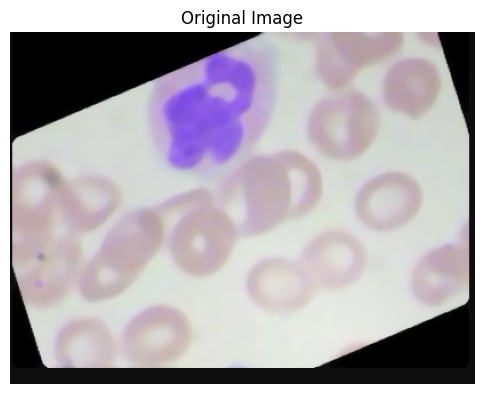

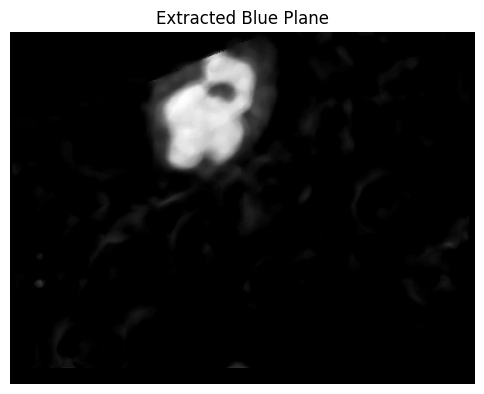

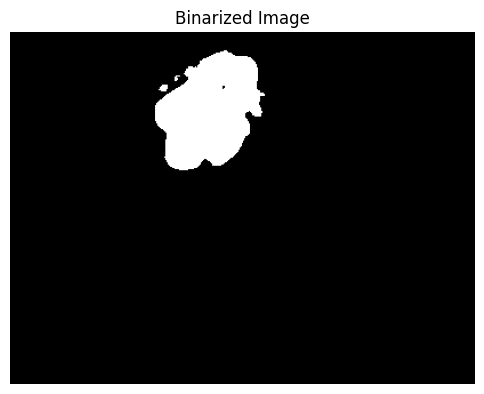

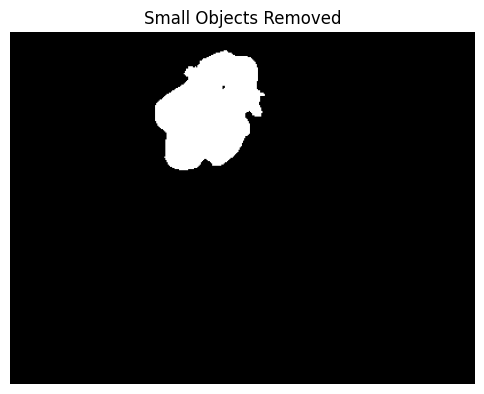

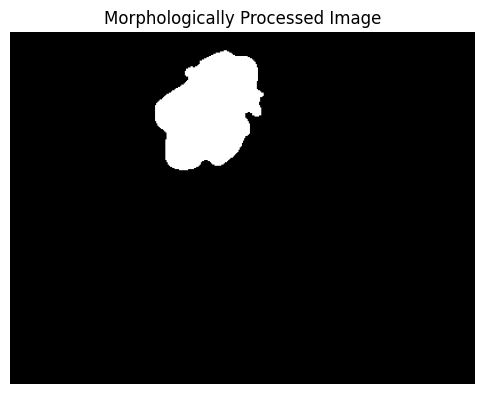

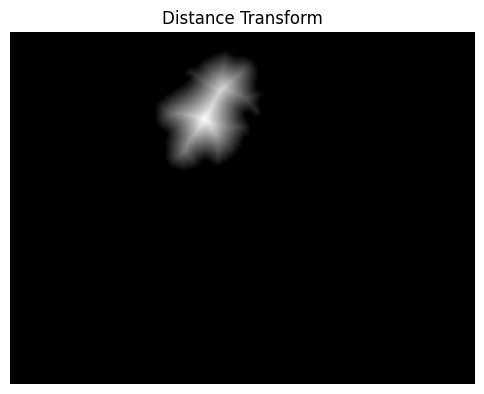

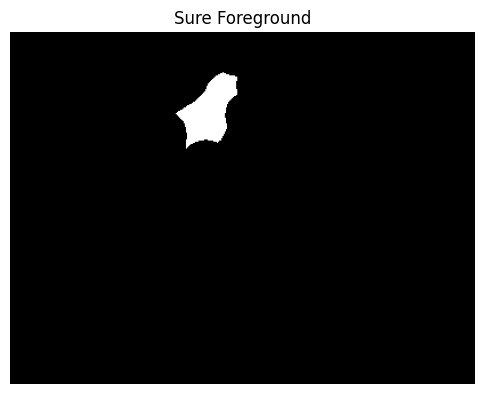

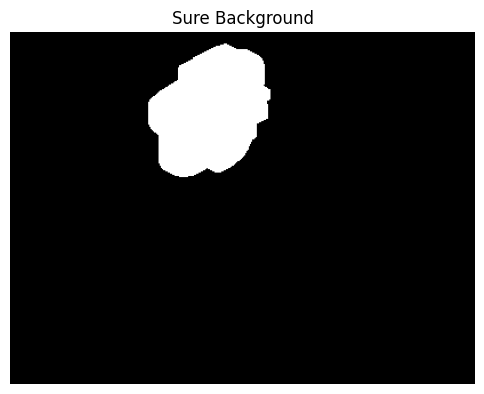

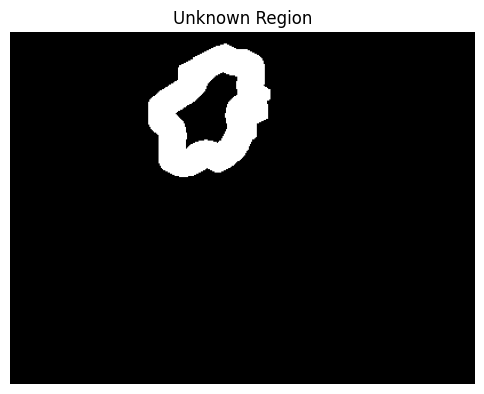

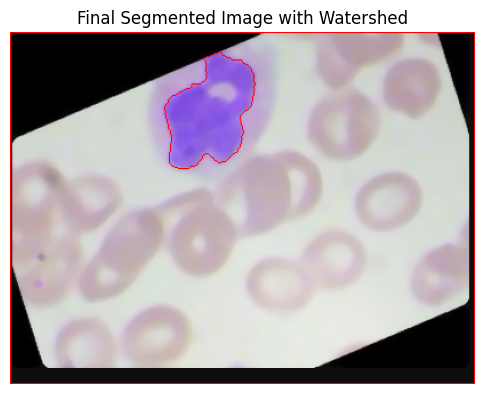

Number of segmented nuclei: 1
Nucleus 2: area = 5166 pixels
Nucleus 2: circularity = 0.57


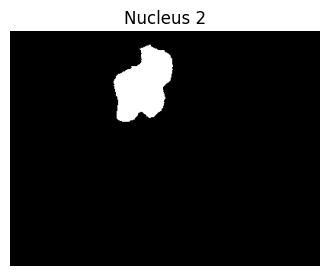

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Read and Display the Image
# ---------------------------
image = cv2.imread('/content/median_filtered.png')
if image is None:
    raise FileNotFoundError("Image file not found. Please ensure 'median_filtered.png' is in your working directory.")

# Convert BGR (OpenCV default) to RGB for display purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# ---------------------------
# 2. Segmentation by Color
# ---------------------------
# Extract the blue plane using the formula: BPlane = I_B - 0.5 * I_R - 0.5 * I_G
B, G, R = cv2.split(image)
# Convert channels to float for arithmetic operation
B = B.astype(np.float32)
G = G.astype(np.float32)
R = R.astype(np.float32)
blue_plane = B - 0.5 * R - 0.5 * G
# Clip values to valid [0, 255] range and convert back to uint8
blue_plane = np.clip(blue_plane, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(blue_plane, cmap="gray")
plt.title("Extracted Blue Plane")
plt.axis("off")
plt.show()

# Threshold the blue plane (threshold value of 29 determined from histogram analysis)
ret, binary = cv2.threshold(blue_plane, 29, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap="gray")
plt.title("Binarized Image")
plt.axis("off")
plt.show()

# Remove small objects (connected components with fewer than 1000 pixels)
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)
min_size = 1000  # Minimum area in pixels
filtered_binary = np.zeros_like(binary)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_binary[labels == i] = 255

plt.figure(figsize=(6, 6))
plt.imshow(filtered_binary, cmap="gray")
plt.title("Small Objects Removed")
plt.axis("off")
plt.show()

# Apply morphological operations: closing (fill holes) then opening (remove noise)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(filtered_binary, cv2.MORPH_CLOSE, kernel, iterations=1)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

plt.figure(figsize=(6, 6))
plt.imshow(opened, cmap="gray")
plt.title("Morphologically Processed Image")
plt.axis("off")
plt.show()

# ---------------------------
# 3. Splitting Touching Nuclei using Watershed
# ---------------------------
# Compute the distance transform of the processed binary image
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 5)
plt.figure(figsize=(6, 6))
plt.imshow(dist_transform, cmap="gray")
plt.title("Distance Transform")
plt.axis("off")
plt.show()

# Threshold the distance transform to get the sure foreground region
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(sure_fg, cmap="gray")
plt.title("Sure Foreground")
plt.axis("off")
plt.show()

# Determine the sure background by dilating the processed image
sure_bg = cv2.dilate(opened, kernel, iterations=3)
plt.figure(figsize=(6, 6))
plt.imshow(sure_bg, cmap="gray")
plt.title("Sure Background")
plt.axis("off")
plt.show()

# Identify the unknown region by subtracting foreground from background
unknown = cv2.subtract(sure_bg, sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(unknown, cmap="gray")
plt.title("Unknown Region")
plt.axis("off")
plt.show()

# Marker labelling for watershed: each connected component in sure foreground is a marker
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Add 1 so background is not 0
markers[unknown == 255] = 0  # Mark unknown regions with zero

# Apply the watershed algorithm on a copy of the original image
image_ws = image.copy()
markers = cv2.watershed(image_ws, markers)
# Watershed marks boundaries with -1; highlight them in red
image_ws[markers == -1] = [0, 0, 255]

# Convert to RGB for proper display with matplotlib
final_segmented = cv2.cvtColor(image_ws, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(final_segmented)
plt.title("Final Segmented Image with Watershed")
plt.axis("off")
plt.show()

# ---------------------------
# 4. Evaluation Without Ground Truth
# ---------------------------
# Count the number of segmented nuclei
unique_labels = np.unique(markers)
nuclei_labels = unique_labels[(unique_labels > 1)]  # Exclude -1 (boundaries), 0 (unknown), and 1 (background)
num_nuclei = len(nuclei_labels)
print(f"Number of segmented nuclei: {num_nuclei}")

# Calculate the area of each nucleus
for label in nuclei_labels:
    area = np.sum(markers == label)
    print(f"Nucleus {label}: area = {area} pixels")

# Optional: Compute circularity for each nucleus
for label in nuclei_labels:
    mask = np.where(markers == label, 255, 0).astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = contours[0]
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter > 0:
            circularity = (4 * np.pi * area) / (perimeter ** 2)
            print(f"Nucleus {label}: circularity = {circularity:.2f}")

# Optional: Visualize each nucleus
for label in nuclei_labels:
    mask = np.where(markers == label, 255, 0).astype(np.uint8)
    plt.figure(figsize=(4, 4))
    plt.imshow(mask, cmap="gray")
    plt.title(f"Nucleus {label}")
    plt.axis("off")
    plt.show()

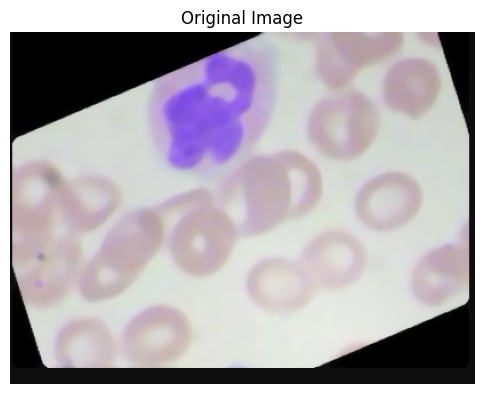

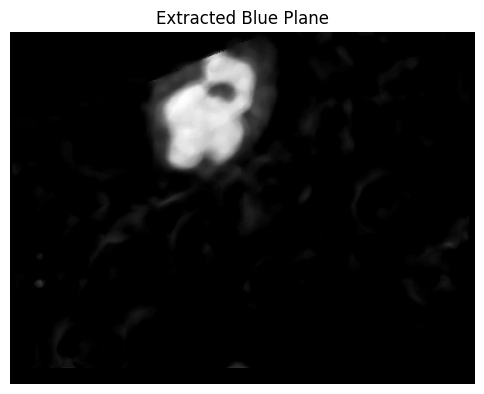

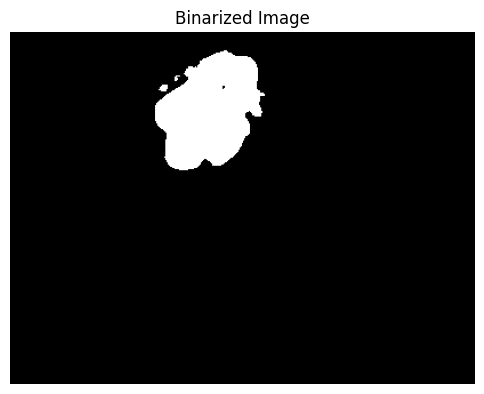

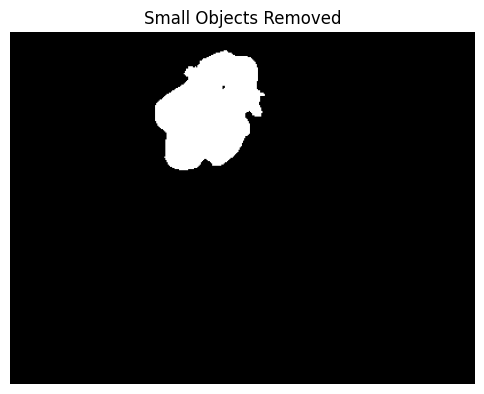

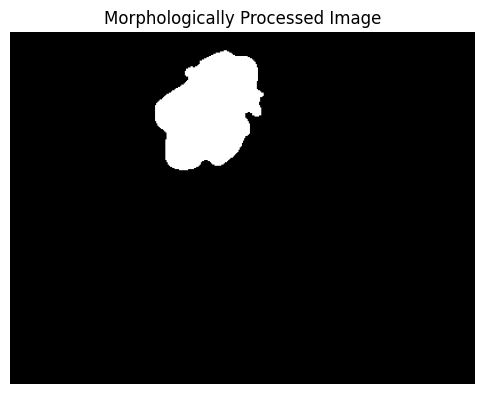

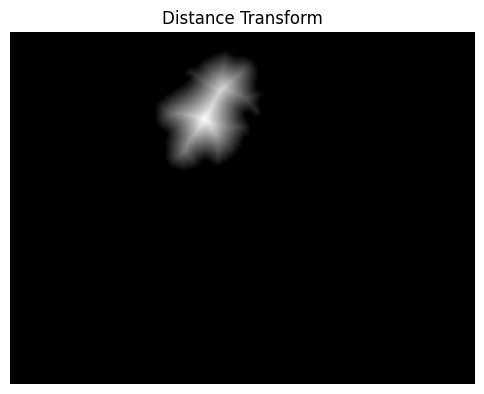

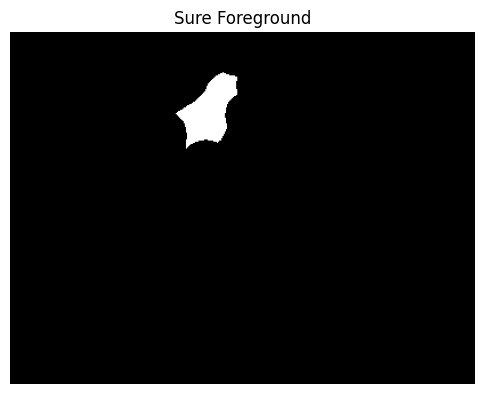

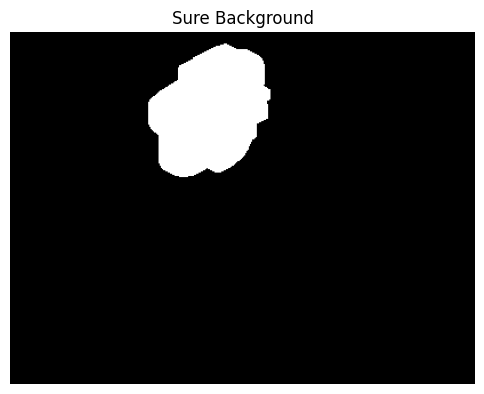

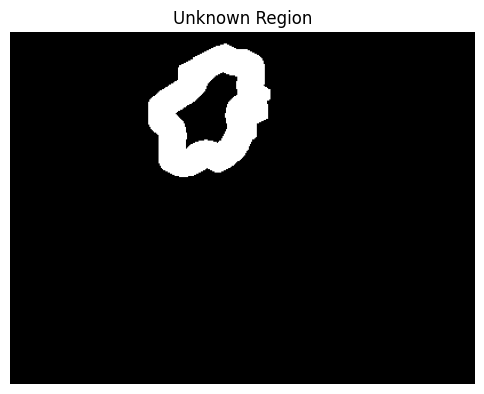

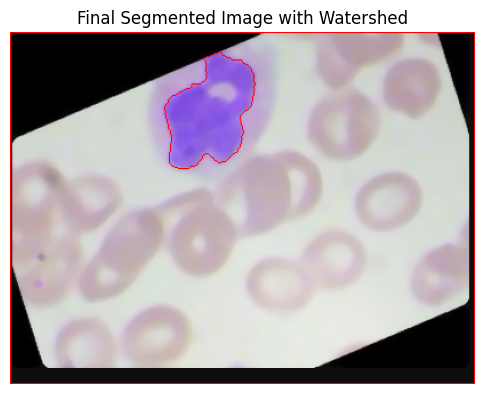

Segmentation Performance Metrics (using pseudo-ground truth):
Pixel Accuracy: 0.9871
IoU: 0.7610
Dice Coefficient: 0.8643
Number of segmented nuclei: 1
Nucleus 2: area = 5166 pixels
Nucleus 2: circularity = 0.57


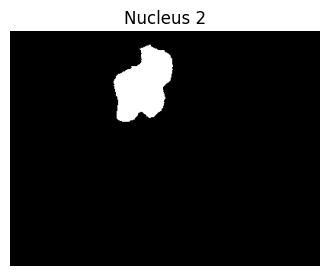

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Read and Display the Image
# ---------------------------
image = cv2.imread('/content/median_filtered.png')
if image is None:
    raise FileNotFoundError("Image file not found. Please ensure 'median_filtered.png' is in your working directory.")

# Convert BGR (OpenCV default) to RGB for display purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# ---------------------------
# 2. Segmentation by Color
# ---------------------------
# Extract the blue plane using the formula: BPlane = I_B - 0.5 * I_R - 0.5 * I_G
B, G, R = cv2.split(image)
B = B.astype(np.float32)
G = G.astype(np.float32)
R = R.astype(np.float32)
blue_plane = B - 0.5 * R - 0.5 * G
blue_plane = np.clip(blue_plane, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(blue_plane, cmap="gray")
plt.title("Extracted Blue Plane")
plt.axis("off")
plt.show()

# Threshold the blue plane (threshold value of 29 determined from histogram analysis)
ret, binary = cv2.threshold(blue_plane, 29, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap="gray")
plt.title("Binarized Image")
plt.axis("off")
plt.show()

# Remove small objects (connected components with fewer than 1000 pixels)
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary, connectivity=8)
min_size = 1000  # Minimum area in pixels
filtered_binary = np.zeros_like(binary)
for i in range(1, num_labels):  # Skip background (label 0)
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_binary[labels == i] = 255

plt.figure(figsize=(6, 6))
plt.imshow(filtered_binary, cmap="gray")
plt.title("Small Objects Removed")
plt.axis("off")
plt.show()

# Apply morphological operations: closing (fill holes) then opening (remove noise)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(filtered_binary, cv2.MORPH_CLOSE, kernel, iterations=1)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

plt.figure(figsize=(6, 6))
plt.imshow(opened, cmap="gray")
plt.title("Morphologically Processed Image")
plt.axis("off")
plt.show()

# ---------------------------
# 3. Splitting Touching Nuclei using Watershed
# ---------------------------
# Compute the distance transform of the processed binary image
dist_transform = cv2.distanceTransform(opened, cv2.DIST_L2, 5)
plt.figure(figsize=(6, 6))
plt.imshow(dist_transform, cmap="gray")
plt.title("Distance Transform")
plt.axis("off")
plt.show()

# Threshold the distance transform to get the sure foreground region
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(sure_fg, cmap="gray")
plt.title("Sure Foreground")
plt.axis("off")
plt.show()

# Determine the sure background by dilating the processed image
sure_bg = cv2.dilate(opened, kernel, iterations=3)
plt.figure(figsize=(6, 6))
plt.imshow(sure_bg, cmap="gray")
plt.title("Sure Background")
plt.axis("off")
plt.show()

# Identify the unknown region by subtracting foreground from background
unknown = cv2.subtract(sure_bg, sure_fg)
plt.figure(figsize=(6, 6))
plt.imshow(unknown, cmap="gray")
plt.title("Unknown Region")
plt.axis("off")
plt.show()

# Marker labelling for watershed: each connected component in sure foreground is a marker
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Add 1 so background is not 0
markers[unknown == 255] = 0  # Mark unknown regions with zero

# Apply the watershed algorithm on a copy of the original image
image_ws = image.copy()
markers = cv2.watershed(image_ws, markers)
# Watershed marks boundaries with -1; highlight them in red
image_ws[markers == -1] = [0, 0, 255]

# Convert to RGB for proper display with matplotlib
final_segmented = cv2.cvtColor(image_ws, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(final_segmented)
plt.title("Final Segmented Image with Watershed")
plt.axis("off")
plt.show()

# ---------------------------
# 4. Evaluation with Pseudo-Ground Truth
# ---------------------------
# Create binary mask from watershed markers (nuclei = 255, background = 0)
segmented_binary = np.where(markers >= 2, 255, 0).astype(np.uint8)

# Use the morphologically processed image (opened) as pseudo-ground truth
gt = opened

# Compute intersection and union
intersection = np.logical_and(segmented_binary == 255, gt == 255)
union = np.logical_or(segmented_binary == 255, gt == 255)

# IoU (Intersection over Union)
iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0

# Dice Coefficient
denominator = np.sum(segmented_binary == 255) + np.sum(gt == 255)
dice = 2 * np.sum(intersection) / denominator if denominator > 0 else 0

# Pixel Accuracy
pixel_accuracy = np.sum(segmented_binary == gt) / gt.size

# Display metrics
print("Segmentation Performance Metrics (using pseudo-ground truth):")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")

# ---------------------------
# 5. Additional Analysis (Original Evaluation)
# ---------------------------
# Count the number of segmented nuclei
unique_labels = np.unique(markers)
nuclei_labels = unique_labels[(unique_labels > 1)]  # Exclude -1 (boundaries), 0 (unknown), and 1 (background)
num_nuclei = len(nuclei_labels)
print(f"Number of segmented nuclei: {num_nuclei}")

# Calculate the area of each nucleus
for label in nuclei_labels:
    area = np.sum(markers == label)
    print(f"Nucleus {label}: area = {area} pixels")

# Optional: Compute circularity for each nucleus
for label in nuclei_labels:
    mask = np.where(markers == label, 255, 0).astype(np.uint8)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = contours[0]
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter > 0:
            circularity = (4 * np.pi * area) / (perimeter ** 2)
            print(f"Nucleus {label}: circularity = {circularity:.2f}")

# Optional: Visualize each nucleus
for label in nuclei_labels:
    mask = np.where(markers == label, 255, 0).astype(np.uint8)
    plt.figure(figsize=(4, 4))
    plt.imshow(mask, cmap="gray")
    plt.title(f"Nucleus {label}")
    plt.axis("off")
    plt.show()